Φ((y-a(x)-μ)/σ) = H(y|x)





In [206]:
import numpy as np
from scipy.stats import norm

def a(x):
  return 0.8*x
def a1(s):
  return 0.8*s+1
def a2(s):
  return np.full(s.shape,-2.0)
def g(y):
  return np.minimum(1, np.maximum(-1, y))
def H(y,x):                 #E(W)=0, Var(W)=1
  return norm.cdf(y-a(x))
def H1(y,x):                 #E(W)=0, Var(W)=1
  return norm.cdf(y-a1(x))
def H2(y,x):                 #E(W)=0, Var(W)=1
  return norm.cdf(y-a2(x))
def R(s):
  return np.minimum(2, s**2)



In [207]:
def mat_F(n,m,X,Y):
  mat_F = np.zeros((m,n))
  for j in range(m):
    for i in range(n):
      if i==0:
        mat_F[j,i]=0.5*(H(Y[i+1],X[j])-H(Y[i],X[j]))
      elif i==n-1:
        mat_F[j,i]=0.5*(H(Y[i],X[j])-H(Y[i-1],X[j]))
      else:
        mat_F[j,i]=0.5*(H(Y[i+1],X[j])-H(Y[i-1],X[j]))

  return mat_F
def mat_F1(n,m,X,Y):
  mat_F = np.zeros((m,n))
  for j in range(m):
    for i in range(n):
      if i==0:
        mat_F[j,i]=0.5*(H1(Y[i+1],X[j])-H1(Y[i],X[j]))
      elif i==n-1:
        mat_F[j,i]=0.5*(H1(Y[i],X[j])-H1(Y[i-1],X[j]))
      else:
        mat_F[j,i]=0.5*(H1(Y[i+1],X[j])-H1(Y[i-1],X[j]))

  return mat_F

def mat_F2(n,m,X,Y):
  mat_F = np.zeros((m,n))
  for j in range(m):
    for i in range(n):
      if i==0:
        mat_F[j,i]=0.5*(H2(Y[i+1],X[j])-H2(Y[i],X[j]))
      elif i==n-1:
        mat_F[j,i]=0.5*(H2(Y[i],X[j])-H2(Y[i-1],X[j]))
      else:
        mat_F[j,i]=0.5*(H2(Y[i+1],X[j])-H2(Y[i-1],X[j]))

  return mat_F

In [231]:
m = 100
n = 500
samples_x = np.linspace(-3,3, m)
samples_y = np.linspace(-8,8, n)
Y=a(samples_y)+np.random.normal()
X=samples_x
#G_Y = np.array([g(y) for y in samples_y]) #g(y)
G_Y = g(samples_y)

# def mat_F(n,m,X,Y):
#   mat_F = np.zeros((m,n))
#   for j in range(m):
#     for i in range(n):
#       if i==0:
#         mat_F[j,i]=0.5*(H(Y[i+1],X[j])-H(Y[i],X[j]))
#       elif i==n-1:
#         mat_F[j,i]=0.5*(H(Y[i],X[j])-H(Y[i-1],X[j]))
#       else:
#         mat_F[j,i]=0.5*(H(Y[i+1],X[j])-H(Y[i-1],X[j]))

#   return mat_F

def V(F,G):
  return np.dot(F,G)

matrix_F = mat_F(n,m,X,Y)
matrix_F1 = mat_F(n,m,X,Y)

V1=V(matrix_F1,Y)
V2=V(matrix_F,G_Y)


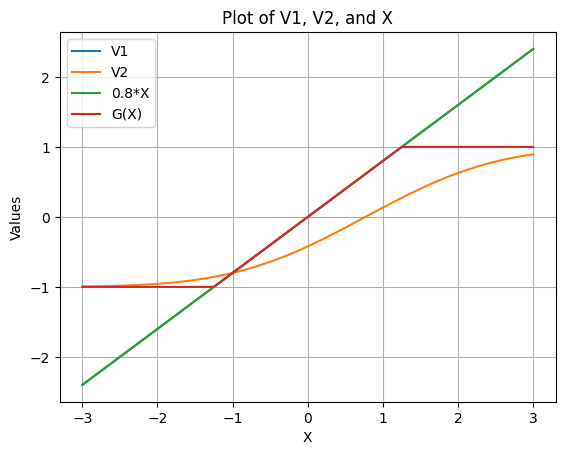

In [232]:
# prompt: plot of V1,V2 and X

import matplotlib.pyplot as plt

# Assuming V1, V2, and X are already defined from the previous code

#plt.figure(figsize=(10, 6))
plt.plot(X, V1, label='V1')
plt.plot(X, V2, label='V2')
plt.plot(X, 0.8*X, label='0.8*X')  # Plotting X against itself for comparison
plt.plot(X, g(0.8*X), label='G(X)')  # Plotting G(X)
#plt.plot(X,Y, label='Y')
#plt.plot(X,G_Y, label='G(Y)')
plt.xlabel('X')
plt.ylabel('Values')
plt.title('Plot of V1, V2, and X')
plt.legend()
plt.grid(True)
plt.show()

In [226]:
m = 200
n1 = 500
n2 = 500
samples_x1 = np.linspace(-8,5, m)
samples_S1 = np.linspace(-15,5, n1)
S_next1=a1(samples_S1)+np.random.normal(size=n1)

samples_x2 = np.linspace(-4,4, m)
samples_S2 =np.linspace(-10,10,n2)
S_next2=a2(samples_S2)+np.random.normal(size=n2)
X1=samples_x1
X2=samples_x2
R_1 = R(S_next1) #(R(s) for activate 1)
R_2 = R(S_next2) #(R(s) for activate 2)

matrix_F1 = mat_F1(n1,m,X1,S_next1)
matrix_F2 = mat_F2(n2,m,X2,S_next2)
V_1=np.dot(matrix_F1, R_1)
V_2=np.dot(matrix_F2, R_2)


2.0 0.0024518650933279774
2.0 4.229234387482599e-07


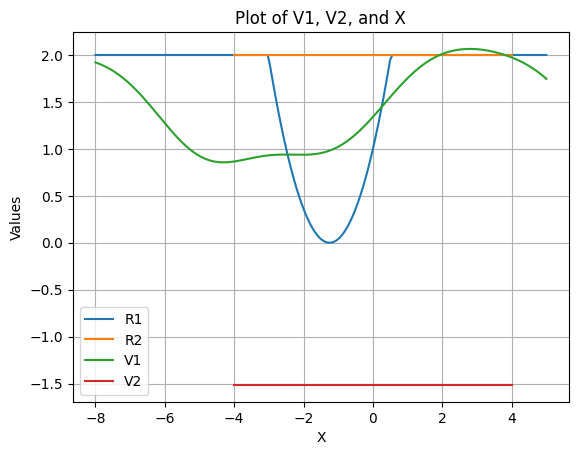

In [230]:

print(max(R_s1), min(R_s1) )
print(max(R_s2), min(R_s2) )
import matplotlib.pyplot as plt

# Assuming V1, V2, and X are already defined from the previous code

#plt.figure(figsize=(10, 6))
#plt.plot(X, 0.8*X+1, label='S1')
#plt.plot(X, np.full(X.shape,-2), label='S2')
plt.plot(X1, R(a1(X1)), label='R1')
plt.plot(X2, R(a2(X2)), label='R2')
plt.plot(X1, V_1, label='V1')
plt.plot(X2, V_2, label='V2')

#plt.plot(X,Y, label='Y')
#plt.plot(X,G_Y, label='G(Y)')
plt.xlabel('X')
plt.ylabel('Values')
plt.title('Plot of V1, V2, and X')
plt.legend()
plt.grid(True)
plt.show()

neural network
z=A1*x+b1
f(z)=ReLU(z)
y=A2*f(z)+b2
y=A2*ReLU(A1*x+b1)+b2

In [115]:
def relu(x):
  return np.maximum(0, x)
def relu_derivative(x):
  return np.where(x > 0, 1, 0)
def sihn(x):
    return (np.exp(x) - np.exp(-x))/2

class NeuralNetwork:
  def __init__(self, size, method = 'A1', g_y=1):
    self.weights1 = np.random.randn(size, 1)
    self.bias1 = np.zeros((size, 1))
    self.weights2 = np.random.randn(1, size)
    self.bias2 = np.zeros((1, 1))

    self.method=method
    self.g_y=g_y

    self.x=0
    self.z1=0
    self.a1=0
    self.z2=0

    self.grad_A1=0
    self.grad_A2=0
    self.grad_B1=0
    self.grad_B2=0

    self.omega=0
    self.rho=0
    self.phi=0
    self.psi=0

  def forward(self, x):
    self.x=x
    self.z1 = np.dot(self.weights1,x) + self.bias1
    self.a1 = relu(self.z1)
    self.z2 = np.dot(self.weights2, self.a1) + self.bias2
    self.z2 = self.z2[0][0]
    if self.method=='A1':
      self.omega=self.z2
      self.rho=-1
      self.phi=self.z2**2/2
      self.psi=-self.z2
    elif self.method=='A2':
      self.z2=np.clip(self.z2,-709,709)
      self.z1=np.clip(self.z1,-709,709)
      self.omega=sihn(self.z2)
      self.rho=-np.exp(-0.5*np.abs(self.z2))
      self.phi= np.exp(0.5*np.abs(self.z2))-1+(1/3)*(np.exp(-1.5*np.abs(self.z2))-1)
      self.psi= 2*np.sign(self.z2)*(np.exp(-0.5*np.abs(self.z2))-1)
    elif self.method=='C1' and self.g_y==2:
      self.omega=-1/(1+np.exp(self.z2))+np.exp(self.z2)/(1+np.exp(self.z2))
      self.rho=-np.exp(self.z2)/(1+np.exp(self.z2))
      self.phi=2/(1+np.exp(self.z2))+np.log(1+np.exp(self.z2))
      self.psi=-np.log(1+np.exp(self.z2))
    elif self.method=='C1' and self.g_y==3:
      self.omega=2*np.exp(self.z2)/(1+np.exp(self.z2))
      self.rho=-np.exp(self.z2)/(1+np.exp(self.z2))
      self.phi=2/(1+np.exp(self.z2))+2*np.log(1+np.exp(self.z2))
      self.psi=-np.log(1+np.exp(self.z2))
    else:
      self.omega=10*np.exp(self.z2)/(1+np.exp(self.z2))
      self.rho=-np.exp(self.z2)/(1+np.exp(self.z2))
      self.phi=10/(1+np.exp(self.z2))+10*np.log(1+np.exp(self.z2))
      self.psi=-np.log(1+np.exp(self.z2))
    return self.z2

  def J(self,y):
    if self.g_y==1:
      return self.phi+y*self.psi
    elif self.g_y==2:
      return self.phi+g(y)*self.psi
    elif self.g_y==3:
      return self.phi+R(y)*self.psi

  def gradients(self,y):
    if self.g_y==1:
      U2=(y-self.omega)*self.rho
    elif self.g_y==2:
      U2=(g(y)-self.omega)*self.rho
    elif self.g_y==3:
      U2=(R(y)-self.omega)*self.rho
    V2=U2
    U1=self.weights2.T*V2
    V1=U1*relu_derivative(self.z1)
    self.grad_A1=np.dot(V1,self.x.T)
    self.grad_A2=np.dot(V2,self.z1.T)
    self.grad_B1=V1
    self.grad_B2=V2
    return

  def gradient_descent(self, X, Y, len_epoch, lr=0.001):
    self.forward(X[0])
    self.gradients(Y[0])
    cost = self.J(Y[0])

    grad_A1_epoch=np.copy(self.grad_A1).astype(np.float64)
    grad_A2_epoch=np.copy(self.grad_A2).astype(np.float64)
    grad_B1_epoch=np.copy(self.grad_B1).astype(np.float64)
    grad_B2_epoch=np.copy(self.grad_B2).astype(np.float64)
    for i in range(1,len_epoch):
      self.forward(X[i])
      self.gradients(Y[i])
      cost+=self.J(Y[i])
      grad_A1_epoch+=self.grad_A1
      grad_A2_epoch+=self.grad_A2
      grad_B1_epoch+=self.grad_B1
      grad_B2_epoch+=self.grad_B2

    grad_A1_epoch/=len_epoch
    grad_A2_epoch/=len_epoch
    grad_B1_epoch/=len_epoch
    grad_B2_epoch/=len_epoch
    cost/=len_epoch

    self.weights1 -= lr*grad_A1_epoch
    self.weights2 -= lr*grad_A2_epoch
    self.bias1    -= lr*grad_B1_epoch
    self.bias2    -= lr*grad_B2_epoch
    return cost
  def train(self, X, Y, epoch, lr=0.001, iterations=100):
    len_epoch=len(X)//epoch
    len_epoch=max(1,len_epoch)
    costs=np.zeros(iterations*epoch)

    for i in range(iterations):
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X = X[indices]
      Y = Y[indices]
      for j in range(epoch):
        X_epoch=X[j*len_epoch:(j+1)*len_epoch]
        Y_epoch=Y[j*len_epoch:(j+1)*len_epoch]
        #print(X_epoch.shape,X.shape)
        costs[i*epoch+j]=self.gradient_descent(X_epoch, Y_epoch, len_epoch, lr)

    return costs




In [233]:
class Reinforcement_Learning_Network(NeuralNetwork):
  def __init__(self, size, method = 'A1', ghamma=0.8):
    super().__init__(size, method, g_y=-1)
    self.ghamma=ghamma

  def J(self,y,omegas):
    return self.phi+(R(y)+self.ghamma*max(omegas))*self.psi

  def gradients(self,y, omegas):
    U2=(R(y)-self.ghamma*max(omegas))*self.rho
    V2=U2
    U1=self.weights2.T*V2
    V1=U1*relu_derivative(self.z1)
    self.grad_A1=np.dot(V1,self.x.T)
    self.grad_A2=np.dot(V2,self.z1.T)
    self.grad_B1=V1
    self.grad_B2=V2




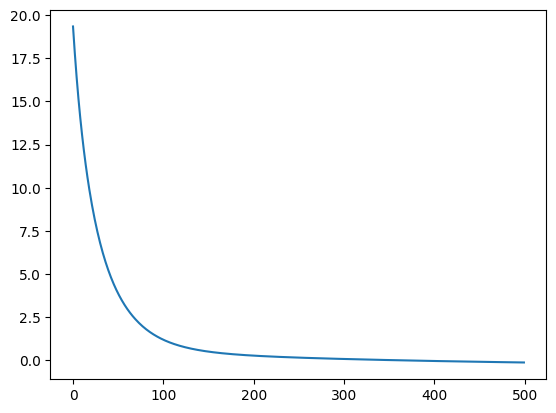

In [247]:
# Example usage:
size=50
# Create a neural network instance
nn1 = NeuralNetwork(size,method='A1', g_y=1)
X=np.random.normal(size=1000)

Y=0.8*X+np.random.normal(size=1000)
# for i in range(500):
#   Y[i]=g(Y[i])
costs=nn1.train(X,Y,1,iterations=500, lr=0.0008)
plt.plot(costs)
plt.show()



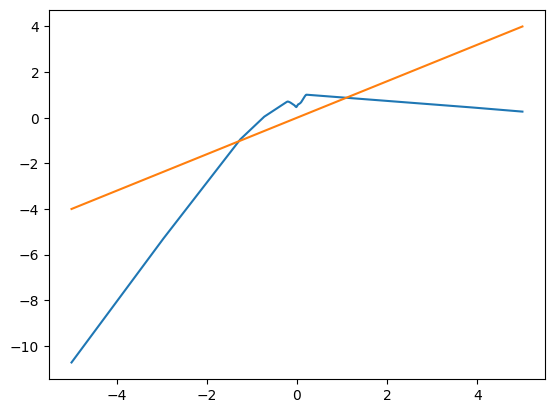

In [276]:
X=np.linspace(-5,5,1000)
Y=np.zeros(1000)
for i in range(1000):
  nn1.forward(X[i])
  Y[i]=nn1.omega

plt.plot(X,Y)
plt.plot(X,0.8*X)
plt.show()

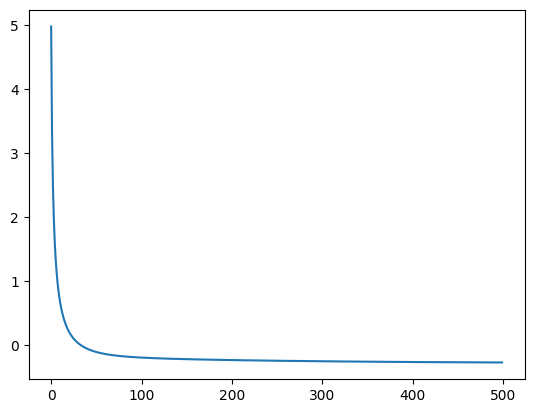

In [240]:
# Example usage:
size=50
# Create a neural network instance
nn2 = NeuralNetwork(size,method='A2', g_y=1)
X=np.random.normal(size=1000)

Y=0.8*X+np.random.normal(size=1000)
# for i in range(500):
#   Y[i]=g(Y[i])
costs=nn2.train(X,Y,1,iterations=500, lr=0.0008)
plt.plot(costs)
plt.show()



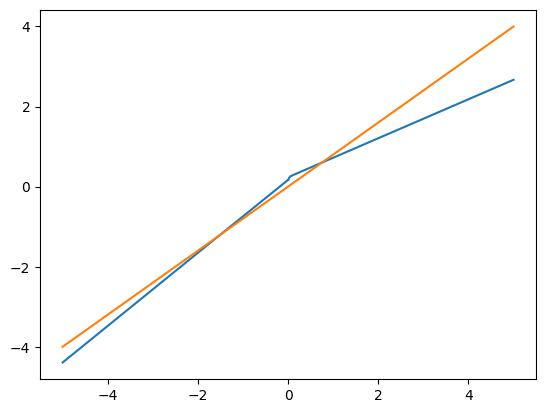

In [251]:
X=np.linspace(-5,5,1000)
Y=np.zeros(1000)
for i in range(1000):
  nn2.forward(X[i])
  Y[i]=nn2.omega
plt.plot(X,Y)
plt.plot(X,0.8*X)
plt.show()


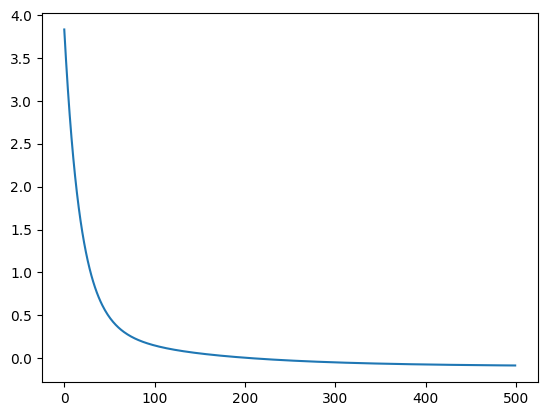

In [283]:
# Example usage:
size=50
# Create a neural network instance
nn3 = NeuralNetwork(size,method='A1', g_y=2)
X=np.random.normal(size=1000)

Y=0.8*X+np.random.normal(size=1000)
for i in range(1000):
   Y[i]=g(Y[i])
costs=nn3.train(X,Y,1,iterations=500, lr=0.001)
plt.plot(costs)
plt.show()



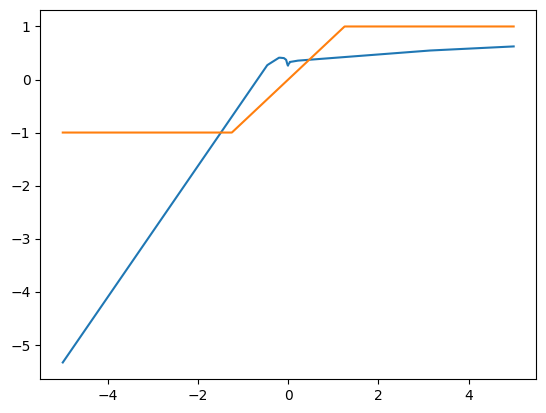

In [282]:
X=np.linspace(-5,5,1000)
Y=np.zeros(1000)
for i in range(1000):
  Y[i]=nn3.forward(X[i])
plt.plot(X,Y)
plt.plot(X,g(0.8*X))
plt.show()


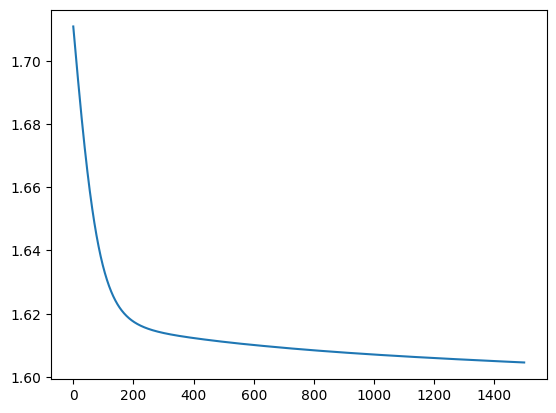

In [285]:
# Example usage:
size=50
# Create a neural network instance
nn4 = NeuralNetwork(size,method='C1', g_y=2)
X=np.random.normal(size=500)

Y=0.8*X+np.random.normal(size=500)
for i in range(500):
   Y[i]=g(Y[i])

costs=nn4.train(X,Y,1,iterations=1500, lr=0.001)
plt.plot(costs)
plt.show()



1.0 -1.0


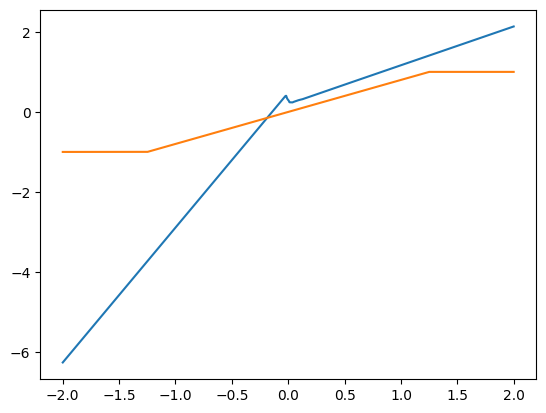

In [286]:
print(np.max(Y), np.min(Y))
X=np.linspace(-2,2,1000)
Y=np.zeros(1000)
for i in range(1000):
  Y[i]=nn4.forward(X[i])
plt.plot(X,Y)
plt.plot(X,g(0.8*X))
plt.show()


In [298]:
import random

S = np.random.normal(size=1000)

pairs1 = []
pairs2 = []

for s in S:
    # Choose between a1 and a2 with 50% probability
    if random.random() < 0.5:
        pairs1.append((s, R(a1(s))+np.random.normal()))  #Pair with a1
    else:
        pairs2.append((s, R(a2(s)))) #Pair with a2
S1=np.array([pair[0] for pair in pairs1])
S2=np.array([pair[0] for pair in pairs2])
S1_next=np.array([pair[1] for pair in pairs1])
S2_next=np.array([pair[1] for pair in pairs2])
print(len(S1))
print(len(S2))

489
511


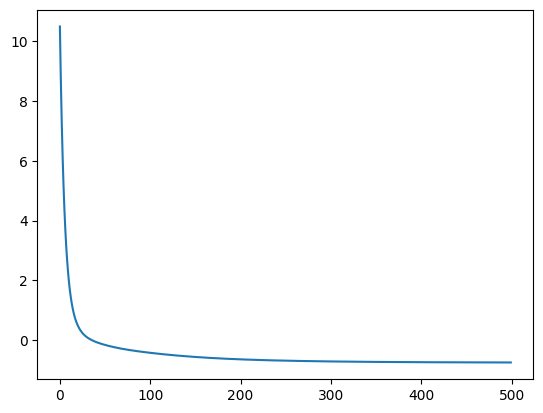

In [302]:
size=100
# Create a neural network instance
nn5 = NeuralNetwork(size,method='A1', g_y=3)
costs=nn5.train(S1,S1_next,1,iterations=500, lr=0.001)
plt.plot(costs)
plt.show()



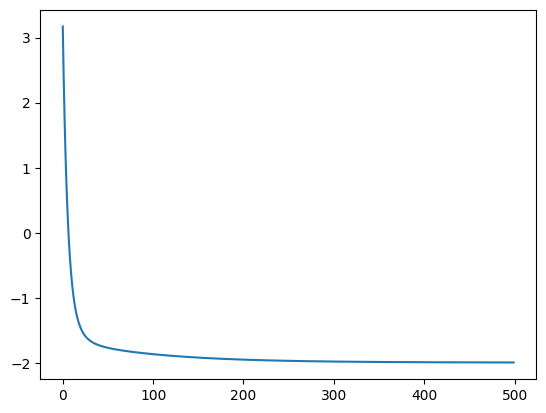

In [303]:
size=100
# Create a neural network instance
nn6 = NeuralNetwork(size,method='A1', g_y=3)

costs=nn6.train(S2,S2_next,1,iterations=500, lr=0.001)
plt.plot(costs)
plt.show()



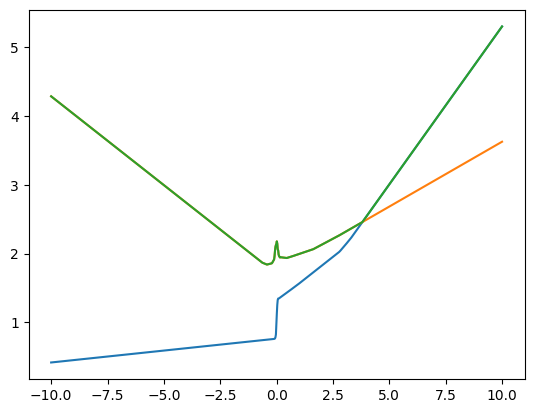

In [308]:
X=np.linspace(-10,10,1000)
Y1=np.zeros(1000)
Y2=np.zeros(1000)
for i in range(1000):
  Y1[i]=nn5.forward(X[i])
  Y2[i]=nn6.forward(X[i])

plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,np.maximum(Y1,Y2))
plt.show()


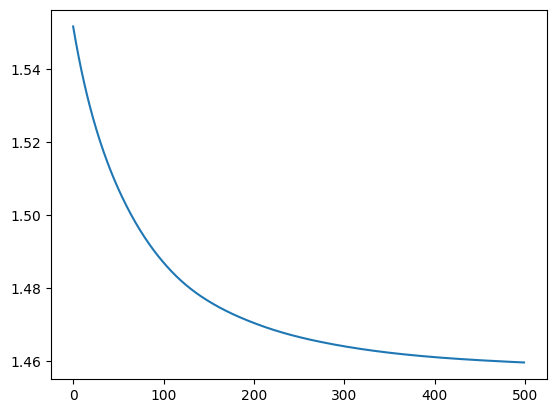

In [314]:
size=100
# Create a neural ntwork instance
nn7 = NeuralNetwork(size,method='C1', g_y=3)

costs=nn7.train(S1,S1_next,1,iterations=500, lr=0.003)
plt.plot(costs)
plt.show()



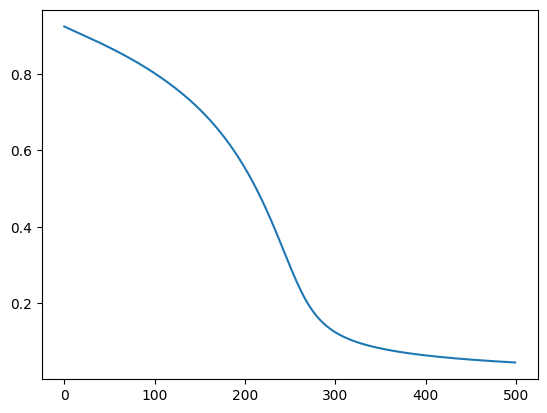

In [315]:
size=100
# Create a neural network instance
nn8 = NeuralNetwork(size,method='C1', g_y=3)

costs=nn8.train(S2,S2_next,1,iterations=500, lr=0.003)
plt.plot(costs)
plt.show()



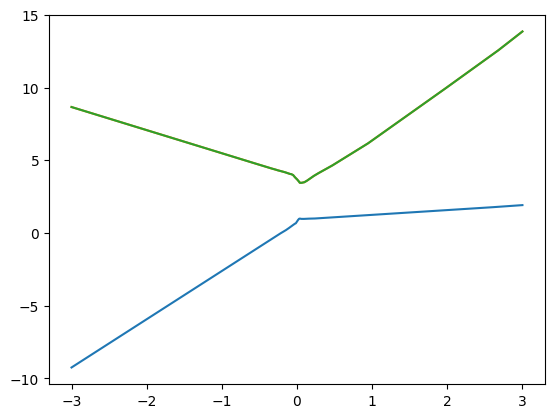

In [313]:
X=np.linspace(-3,3,1000)
Y1=np.zeros(1000)
Y2=np.zeros(1000)
for i in range(1000):
  Y1[i]=nn7.forward(X[i])
  Y2[i]=nn8.forward(X[i])

plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,np.maximum(Y1,Y2))
plt.show()


In [294]:
rln1=Reinforcement_Learning_Network(size = 50)
rln2=Reinforcement_Learning_Network(size = 50)
X1 = S1
Y1 = S1_next
X2 = S2
Y2 = S2_next

iterations = 1000
costs1 = np.zeros(iterations)
costs2 = np.zeros(iterations)
lr=0.001
for i in range (iterations):
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  X1 = X1[indices]
  Y1 = Y1[indices]
  rln1.forward(X1[0])
  rln2.forward(X2[0])
  omegas=np.array([rln1.omega,rln2.omega])

  rln1.gradients(Y1[0], omegas)
  rln2.gradients(Y2[0], omegas)
  #print(rln1.J(Y[0],omegas), rln2.J(Y[0],omegas))

  cost1=rln1.J(Y1[0], omegas)
  cost2=rln2.J(Y2[0], omegas)

  grad_A11=np.copy(rln1.grad_A1).astype(np.float64)
  grad_A21=np.copy(rln1.grad_A2).astype(np.float64)
  grad_B11=np.copy(rln1.grad_B1).astype(np.float64)
  grad_B21=np.copy(rln1.grad_B2).astype(np.float64)
  grad_A12=np.copy(rln2.grad_A1).astype(np.float64)
  grad_A22=np.copy(rln2.grad_A2).astype(np.float64)
  grad_B12=np.copy(rln2.grad_B1).astype(np.float64)
  grad_B22=np.copy(rln2.grad_B2).astype(np.float64)
  for x in range(len(X)):

    rln1.forward(X[i])
    rln2.forward(X[i])

    rln1.gradients(Y[i],omegas)
    rln2.gradients(Y[i],omegas)

    cost1+=rln1.J(Y[i], omegas)
    cost2+=rln2.J(Y[i], omegas)

    grad_A11+=rln1.grad_A1
    grad_A21+=rln1.grad_A2
    grad_B11+=rln1.grad_B1
    grad_B21+=rln1.grad_B2
    grad_A12+=rln2.grad_A1
    grad_A22+=rln2.grad_A2
    grad_B12+=rln2.grad_B1
    grad_B22+=rln2.grad_B2
  grad_A11/=len(X)
  grad_A21/=len(X)
  grad_B11/=len(X)
  grad_B21/=len(X)
  grad_A12/=len(X)
  grad_A22/=len(X)
  grad_B12/=len(X)
  grad_B22/=len(X)

  cost1/=len(X)
  cost2/=len(X)

  rln1.weights1 -= lr*grad_A11
  rln1.weights2 -= lr*grad_A21
  rln1.bias1    -= lr*grad_B11
  rln1.bias2    -= lr*grad_B21

  rln2.weights1 -= lr*grad_A12
  rln2.weights2 -= lr*grad_A22
  rln2.bias1    -= lr*grad_B12
  rln2.bias2    -= lr*grad_B22
  costs1[i]=cost1
  costs2[i]=cost2

IndexError: index 594 is out of bounds for axis 0 with size 542

In [174]:
class Car:
    def __init__(self, x, y, theta):
        self.x = x
        self.y = y
        self.theta = theta
class Audi(Car):
  def __init__(self, x, y, theta, v):
    super().__init__(x, y, theta)
    self.v=v
  def test(self):
    obj1=super().__init__(self.x,self.y,self.theta)
    obj2=super().__init__(self.x,self.y,self.theta)
    return obj1,obj2

x=Audi(1,2,3,4)
y=Car(1,2,3)
a,b=x.test()
print(type(b),type(b), type(x), type(y))

<class 'NoneType'> <class 'NoneType'> <class '__main__.Audi'> <class '__main__.Car'>
